In [143]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [144]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3 
EPOCHS = 50

In [145]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train", 
    shuffle = True, 
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 16645 files belonging to 9 classes.


In [146]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_']

In [147]:
len(dataset)

521

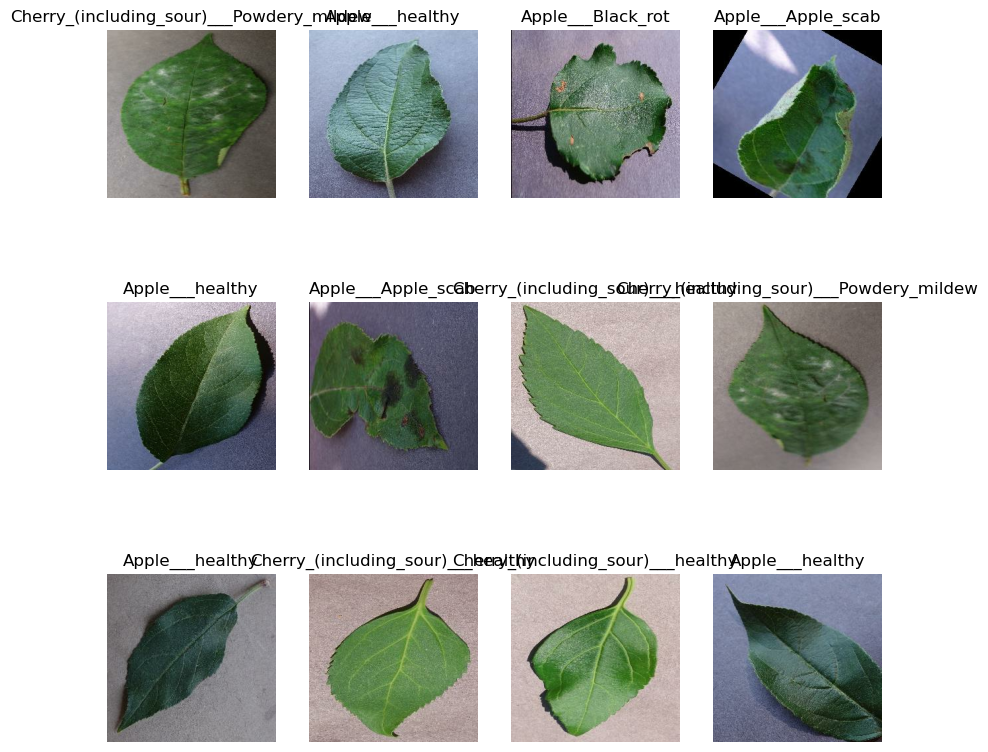

In [148]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [149]:
train_size = 0.8
len(dataset)*train_size 

416.8

In [150]:
train_ds = dataset.take(1757)
len(train_ds)

521

In [151]:
test_ds = dataset.skip(1757)
len(test_ds)

0

In [152]:
val_size = 0.1
len(dataset)*val_size

52.1

In [153]:
val_ds = test_ds.take(219)
len(val_ds)

0

In [154]:
test_ds = test_ds.skip(219)
len(test_ds)

0

In [155]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size) 
    
    return train_ds, val_ds, test_ds

In [156]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [157]:
len(train_ds)

416

In [158]:
len(val_ds)

52

In [159]:
len(test_ds)

53

In [160]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [161]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)    
])

In [162]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)    
])

In [163]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale, 
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    
  
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build( input_shape = input_shape)

In [164]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_19 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_20 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [165]:
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [167]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
416/416 [==============================] - 268s 645ms/step - loss: 0.4820 - accuracy: 0.8300 - val_loss: 0.3869 - val_accuracy: 0.8690
Epoch 2/50
416/416 [==============================] - 262s 629ms/step - loss: 0.2661 - accuracy: 0.9097 - val_loss: 0.3084 - val_accuracy: 0.8984
Epoch 3/50
416/416 [==============================] - 263s 632ms/step - loss: 0.2088 - accuracy: 0.9300 - val_loss: 0.2284 - val_accuracy: 0.9261
Epoch 4/50
416/416 [==============================] - 257s 618ms/step - loss: 0.1586 - accuracy: 0.9456 - val_loss: 0.1630 - val_accuracy: 0.9477
Epoch 5/50
416/416 [==============================] - 258s 621ms/step - loss: 0.1402 - accuracy: 0.9542 - val_loss: 0.1316 - val_accuracy: 0.9495
Epoch 6/50
416/416 [==============================] - 258s 619ms/step - loss: 0.1294 - accuracy: 0.9555 - val_loss: 0.0696 - val_accuracy: 0.9760
Epoch 7/50
416/416 [==============================] - 260s 624ms/step - loss: 0.1289 - accuracy: 0.9569 - val_loss: 0.2007 -

In [169]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


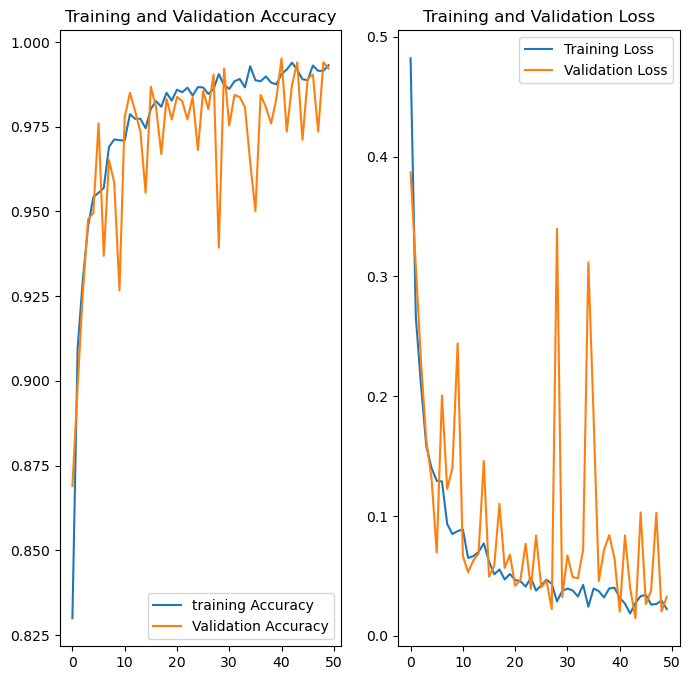

In [170]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt. title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label:  Apple___Cedar_apple_rust
1/1 [==============================] - 0s 171ms/step
predicted label: Apple___Cedar_apple_rust


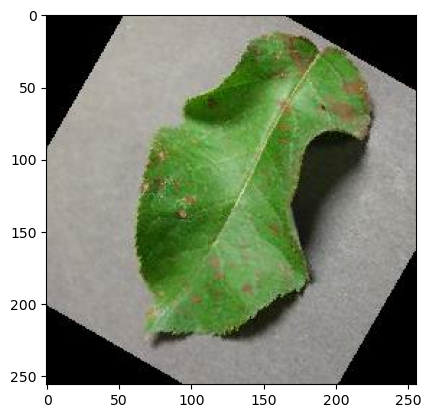

In [173]:
import numpy as np 

for images_batch, labels_batch in train_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])


In [227]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


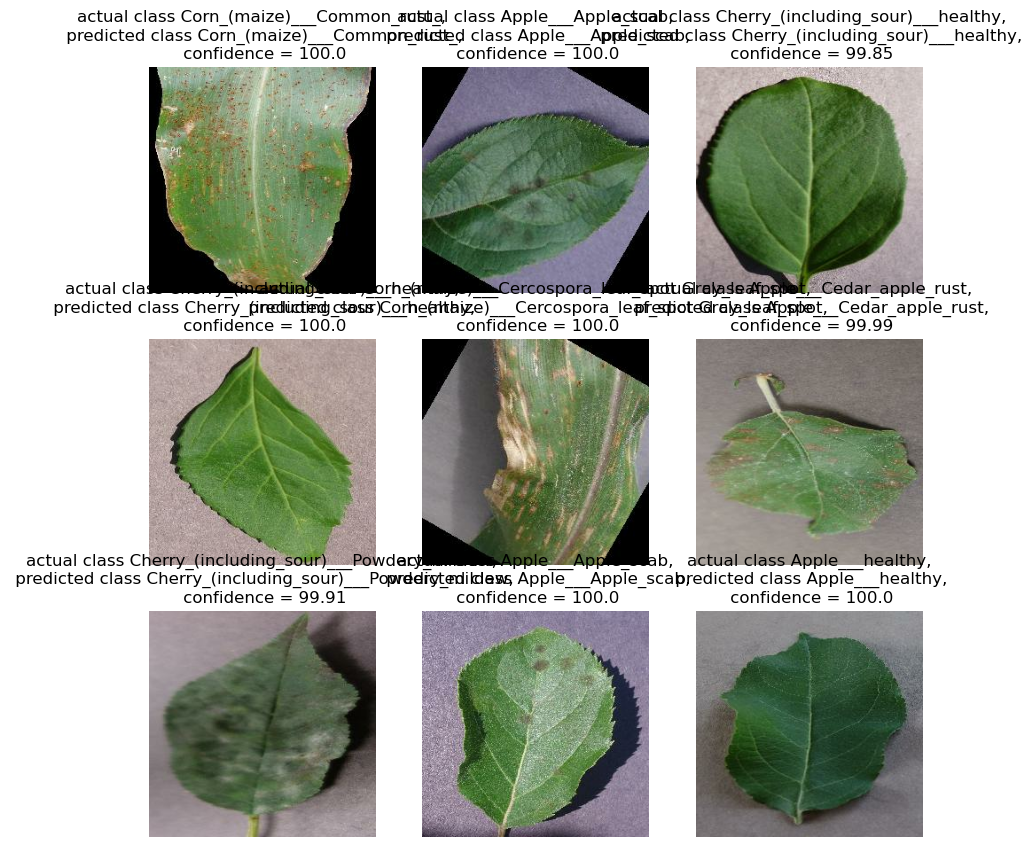

In [228]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"actual class {actual_class},\n predicted class {predicted_class},\n confidence = {confidence}")
        
        plt.axis("off")       
        

In [5]:
import os 
# model_version = 3
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1 
model.save(f"C:/Users/shiva/PycharmProjects/jupyter/Mini_project/models/{model_version}")
# model.save(f"C:\\Users\\shiva\\PycharmProjects\\jupyter\\Mini_project\\models\\{model_version}")
# mo = model.save(f"../models/{model_version}", True)
# model.save_weights(model.h5)
# print(mo)


NameError: name 'model' is not defined